In [12]:
import seaborn as sns
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [13]:
base = pd.read_csv('/workspaces/neurosity-sdk-python/Datas/base2.csv')
grab = pd.read_csv('/workspaces/neurosity-sdk-python/Datas/grab2.csv')

In [3]:
base.head()

,'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p'
0,2.229445,-0.474123,-3.532934,-6.761009,-9.468164,-11.197743,-12.151296,-13.008870,-14.551913,-17.130405,-20.222978,-22.780920,-24.052734,-23.966962,-23.017191,-21.846294
1,-245.805991,-196.473740,-150.162560,-104.935621,-54.712074,6.587895,80.814754,165.068403,252.976223,336.759761,410.530335,471.789063,520.199310,556.497876,581.774283,597.164482
2,175.567570,133.634224,70.824660,14.461835,-11.098024,1.962920,40.341369,79.389042,98.812404,92.321834,67.772549,40.240779,23.312521,24.382984,43.976442,76.176575
3,-254.925116,-153.648505,-31.107808,92.474659,199.476154,282.974947,348.378267,407.463835,468.694637,532.428587,594.024581,647.835991,688.997780,715.642112,730.066506,738.757715
4,-10.143720,-11.875421,-14.184368,-17.043269,-19.524446,-20.665541,-20.408102,-19.922240,-21.027930,-24.783676,-30.356481,-35.390344,-37.541968,-35.935957,-31.481194,-25.990190


In [4]:
grab.head()

,'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p'
0,-18.737833,-16.608687,-15.004605,-14.115354,-13.263699,-11.891296,-10.435508,-10.211770,-12.142661,-15.570423,-18.432985,-18.909942,-17.042369,-14.343988,-12.322250,-11.684574
1,-441.868664,-402.085983,-360.159112,-316.637346,-271.847060,-225.465703,-175.000374,-112.092359,-22.326314,105.782031,269.694114,444.832422,587.130514,656.643611,643.985539,572.872933
2,-1229.072146,-1205.478359,-1192.227558,-1188.118351,-1187.183803,-1183.381047,-1172.527333,-1147.719306,-1096.094612,-1004.922873,-872.645182,-718.043965,-577.747880,-484.762529,-446.014078,-442.095290
3,326.722262,320.755250,316.713552,311.637958,306.106983,305.290233,315.804022,340.028248,374.009726,410.188122,443.125135,470.838042,488.490015,486.213925,455.681616,395.496395
4,-20.717111,-20.566146,-21.211529,-21.586334,-20.130487,-16.376884,-11.900377,-9.396029,-10.435041,-13.943198,-16.751422,-16.354644,-13.239807,-9.834685,-8.248659,-9.197923


In [5]:
base.describe()

,'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p'
count,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000,15344.000000
mean,-1.047463,-0.887962,-0.541082,-0.132937,0.230904,0.515084,0.732913,0.894720,0.987967,0.987718,0.881359,0.662140,0.326798,-0.093517,-0.527267,-0.862006
std,352.129342,352.225901,352.351696,352.479783,352.531348,352.434530,352.189943,351.886108,351.634817,351.484268,351.420491,351.430486,351.519549,351.676795,351.854024,351.999275
min,-2495.316626,-2484.018625,-2478.561548,-2460.182940,-2599.210797,-2714.351413,-2801.350135,-2864.158790,-2908.147521,-2935.449511,-2943.265817,-2926.496624,-2882.243647,-2812.085653,-2720.828417,-2613.884269
25%,-24.923039,-25.463080,-24.251906,-23.842061,-22.909703,-22.121739,-21.660067,-20.987468,-21.408337,-21.489203,-22.009614,-22.169594,-22.549715,-23.397985,-23.971787,-24.604965
50%,0.380643,0.464546,0.637028,0.816556,1.134578,1.058863,0.928136,0.866760,0.807037,0.815904,0.751791,0.981080,0.811168,0.635894,0.439032,0.349219
75%,31.240280,31.600325,32.150262,32.570060,33.519518,33.849488,33.989513,34.684060,34.604995,34.732749,35.787776,35.551053,34.367825,33.201707,31.744564,31.109332
max,2894.213696,3089.831505,3260.171241,3401.953284,3510.947104,3581.556456,3609.736234,3597.173537,3552.382818,3485.463815,3400.657295,3293.773197,3156.717539,3094.229429,3015.979608,2890.790854


In [6]:
grab.describe()

,'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p'
count,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000,15368.000000
mean,-0.983515,-0.901327,-0.655272,-0.316690,0.026774,0.319524,0.540686,0.677612,0.724404,0.683427,0.563753,0.372849,0.118204,-0.180433,-0.490713,-0.746571
std,181.043118,181.051650,181.076911,181.099620,181.101185,181.078720,181.041304,180.988509,180.919657,180.846574,180.785796,180.752674,180.745239,180.736094,180.708379,180.680976
min,-1229.072146,-1205.478359,-1192.227558,-1188.118351,-1187.183803,-1183.381047,-1180.150743,-1176.599599,-1167.816845,-1156.311718,-1144.206243,-1145.386848,-1162.233766,-1165.674429,-1158.130163,-1142.513876
25%,-15.054050,-14.662802,-14.210132,-13.728599,-13.349507,-13.240878,-13.077163,-13.150348,-12.842043,-12.928973,-13.154081,-13.413852,-13.710239,-14.013838,-14.382604,-15.013361
50%,-0.520036,-0.467572,-0.309407,-0.076204,0.122695,0.402967,0.327631,0.432033,0.275669,0.251024,0.148741,-0.018436,-0.175017,-0.233609,-0.400495,-0.333578
75%,14.413976,14.917040,15.288040,15.578294,15.979940,16.245942,16.498960,16.482507,16.475839,16.285358,15.874105,15.489737,15.198514,15.027375,14.573309,14.422641
max,1436.471745,1439.886495,1438.338521,1453.433337,1503.512873,1549.387508,1582.981546,1608.952643,1629.164892,1641.692413,1641.480189,1622.653541,1581.575434,1518.998984,1439.611444,1418.820000


In [14]:
base["sum"] = base.sum(axis=1)/20
grab["sum"] = grab.sum(axis=1)/20

In [9]:
base = (2/(1+1.01**base)-1)*50
grab = (2/(1+1.01**grab)-1)*50

In [15]:
# add values to the "target" column. The number should be 0
base['target'] = 0
grab['target'] = 1

array([[<Axes: title={'center': "'a'"}>,
        <Axes: title={'center': " 'b'"}>,
        <Axes: title={'center': " 'c'"}>,
        <Axes: title={'center': " 'd'"}>],
       [<Axes: title={'center': " 'e'"}>,
        <Axes: title={'center': " 'f'"}>,
        <Axes: title={'center': " 'g'"}>,
        <Axes: title={'center': " 'h'"}>],
       [<Axes: title={'center': " 'i'"}>,
        <Axes: title={'center': " 'j'"}>,
        <Axes: title={'center': " 'k'"}>,
        <Axes: title={'center': " 'l'"}>],
       [<Axes: title={'center': " 'm'"}>,
        <Axes: title={'center': " 'n'"}>,
        <Axes: title={'center': " 'o'"}>,
        <Axes: title={'center': " 'p'"}>],
       [<Axes: title={'center': 'sum'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

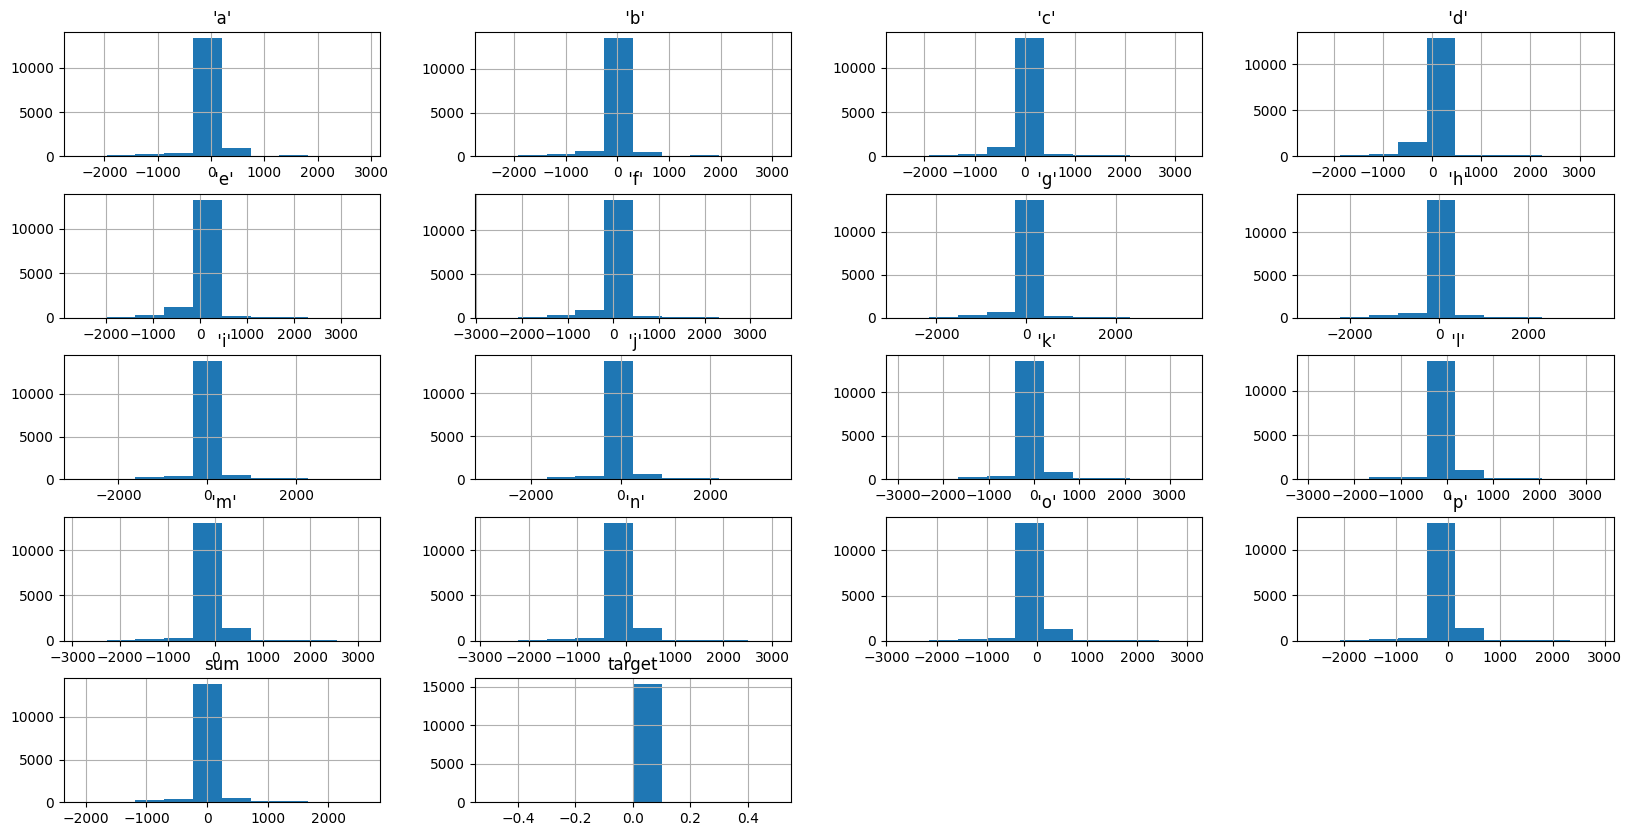

In [16]:
# plot a histogram of the data
# make the size bigger
plt.rcParams['figure.figsize'] = [20, 10]
base.hist()

array([[<Axes: title={'center': "'a'"}>,
        <Axes: title={'center': " 'b'"}>,
        <Axes: title={'center': " 'c'"}>,
        <Axes: title={'center': " 'd'"}>],
       [<Axes: title={'center': " 'e'"}>,
        <Axes: title={'center': " 'f'"}>,
        <Axes: title={'center': " 'g'"}>,
        <Axes: title={'center': " 'h'"}>],
       [<Axes: title={'center': " 'i'"}>,
        <Axes: title={'center': " 'j'"}>,
        <Axes: title={'center': " 'k'"}>,
        <Axes: title={'center': " 'l'"}>],
       [<Axes: title={'center': " 'm'"}>,
        <Axes: title={'center': " 'n'"}>,
        <Axes: title={'center': " 'o'"}>,
        <Axes: title={'center': " 'p'"}>],
       [<Axes: title={'center': 'sum'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

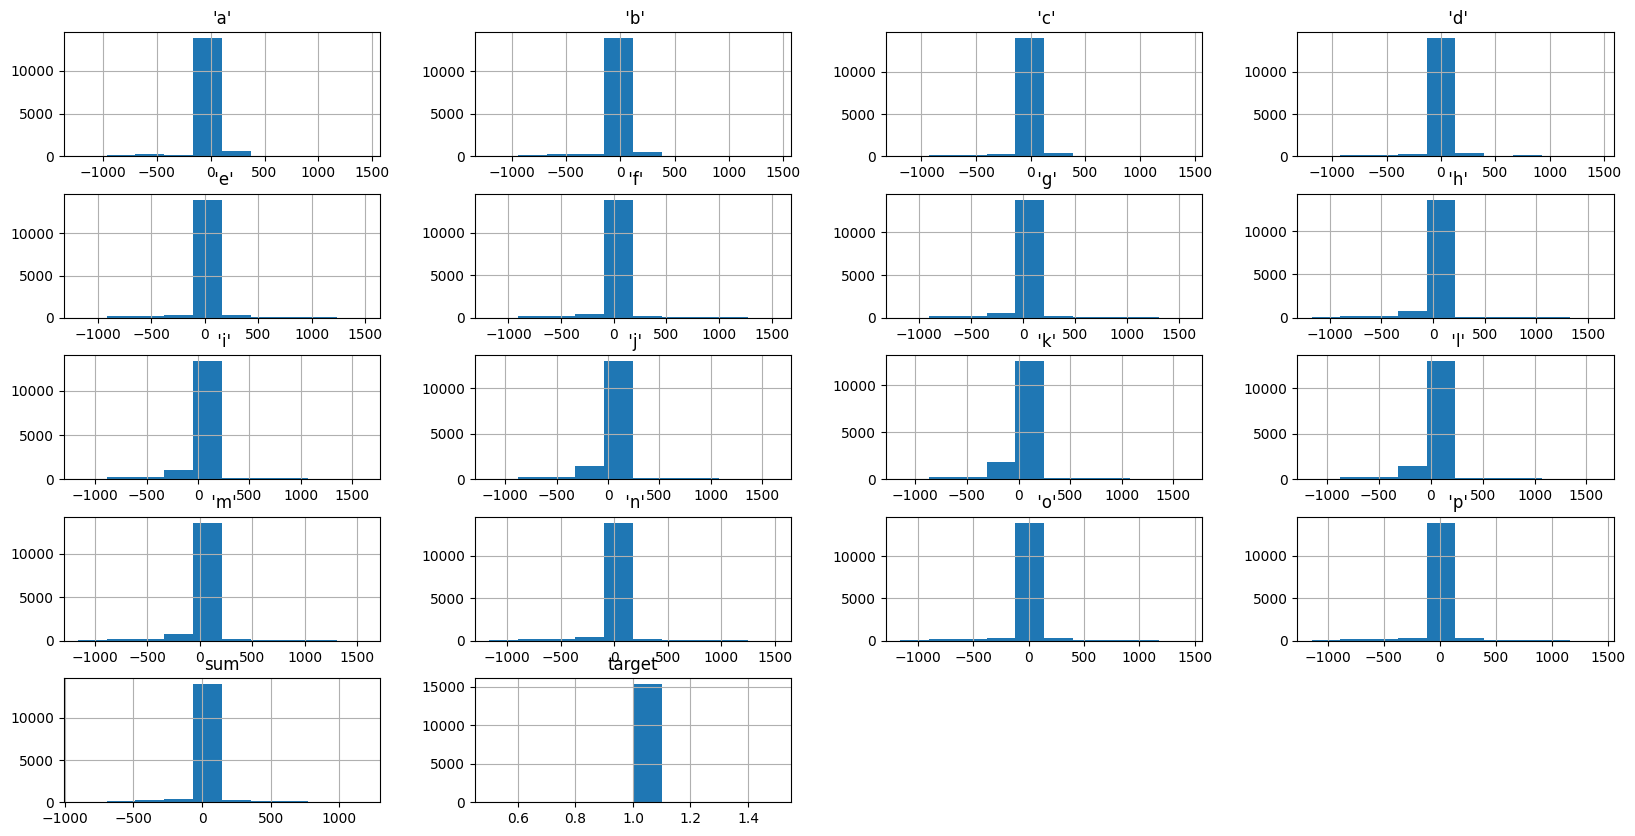

In [17]:
# plot a histogram of the data
# make the size bigger
plt.rcParams['figure.figsize'] = [20, 10]
grab.hist()

<Axes: >

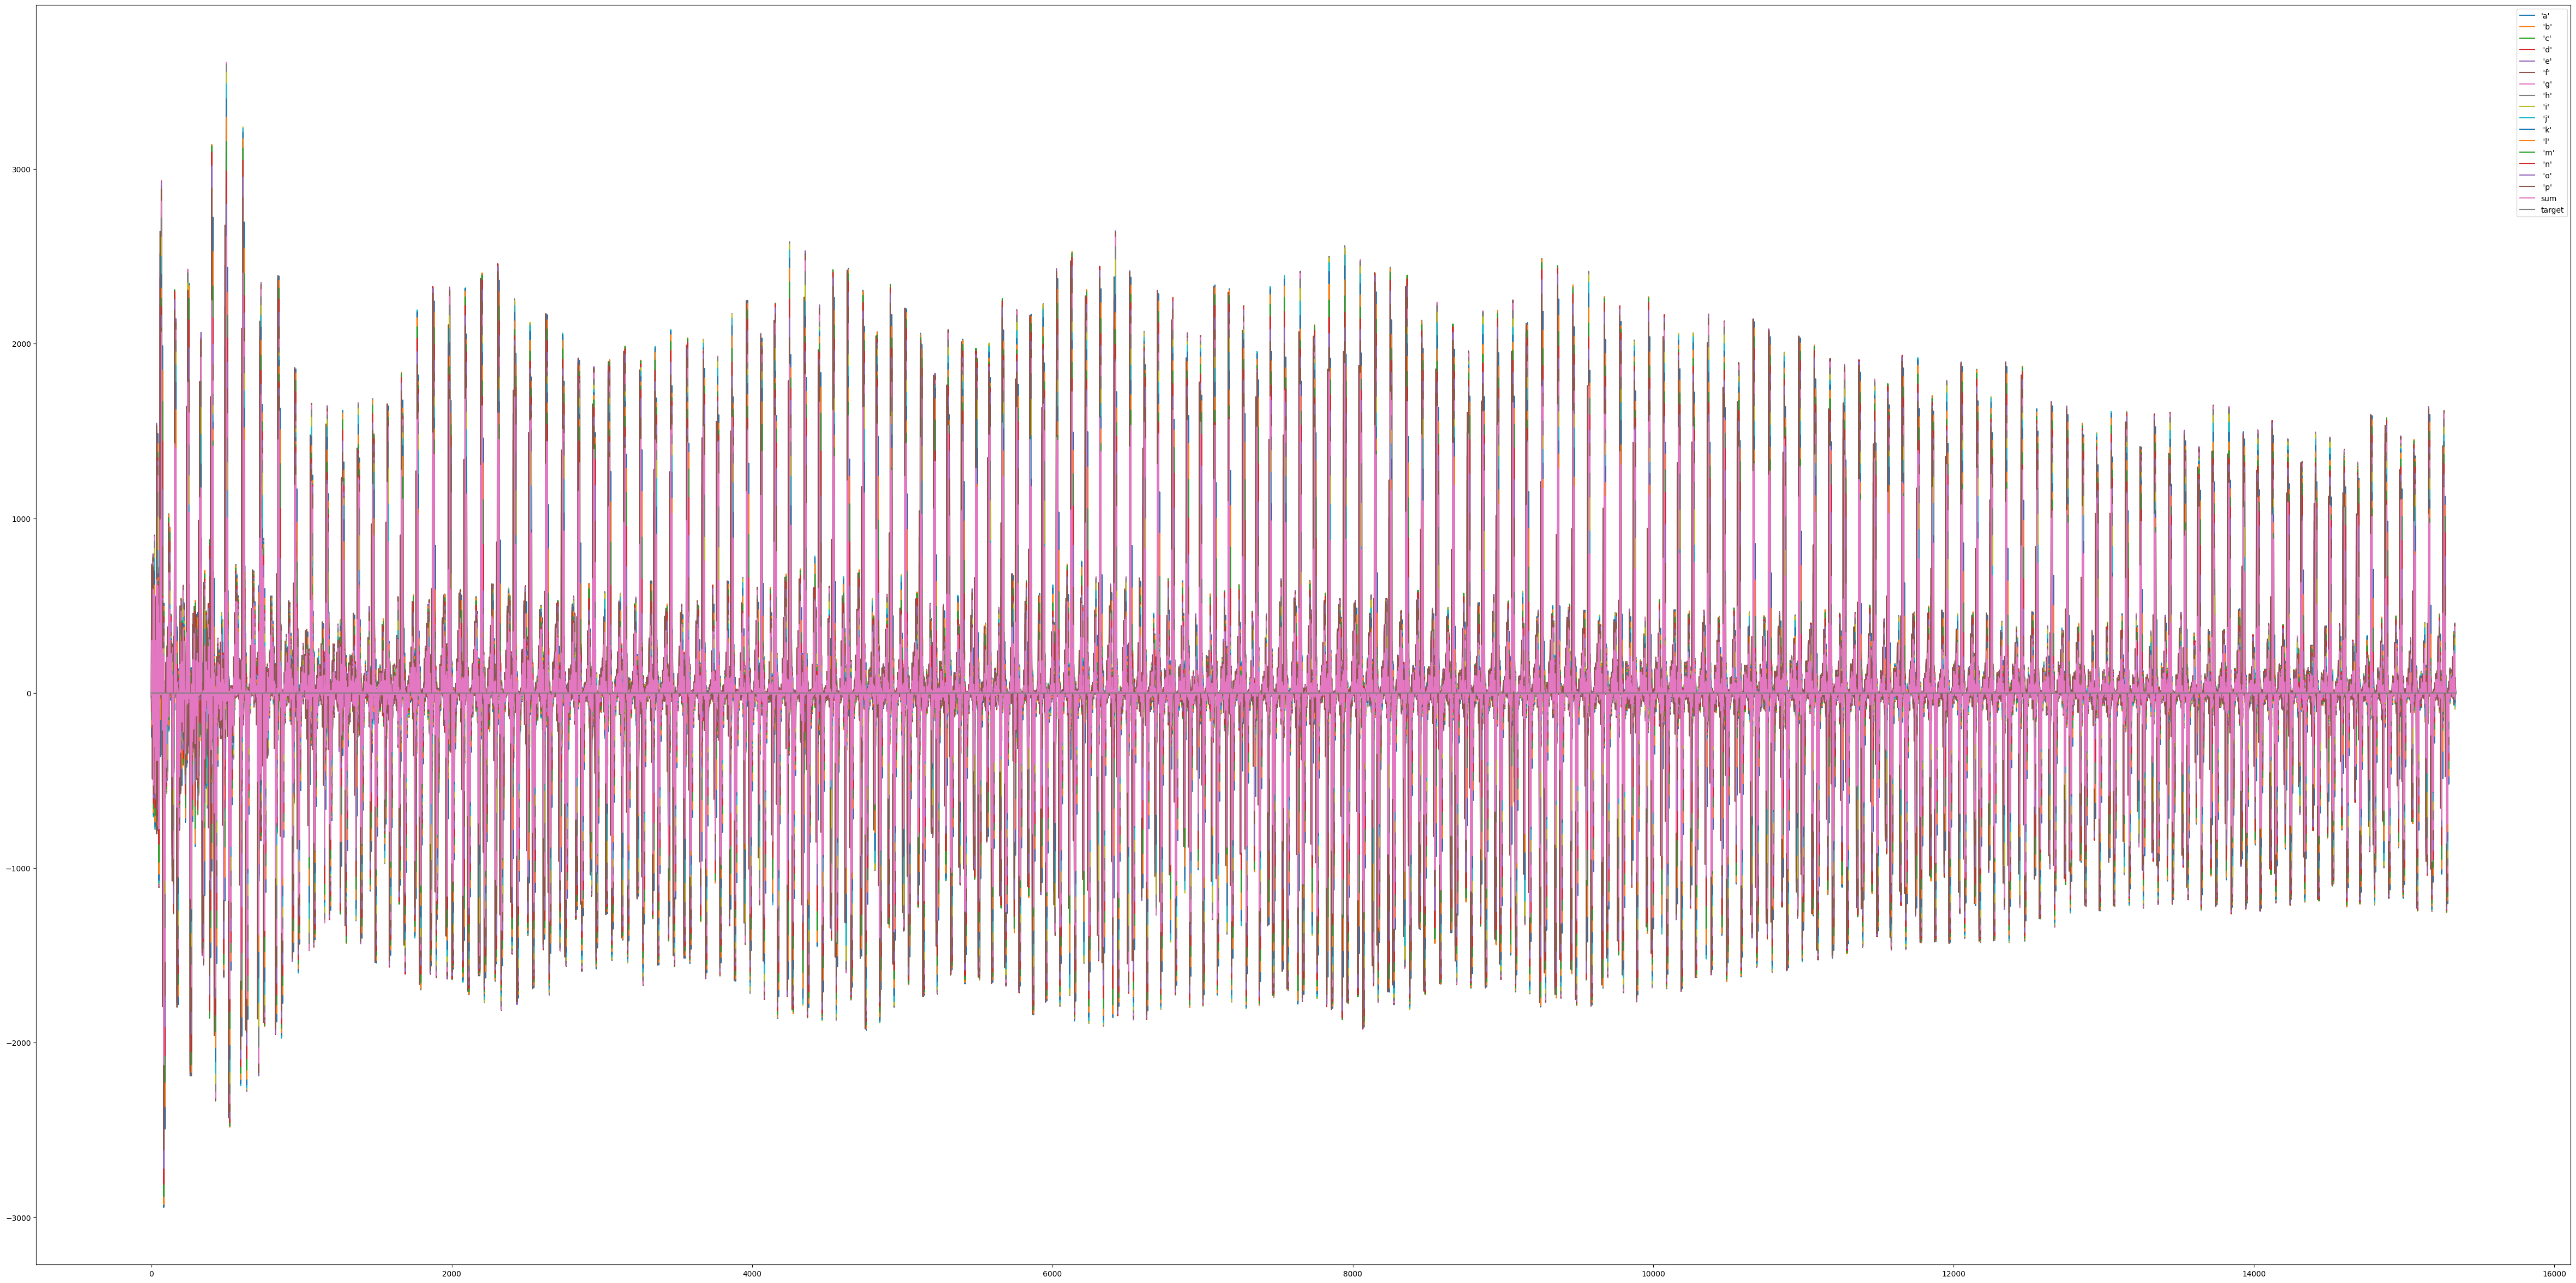

In [26]:
#graph the data
plt.rcParams['figure.figsize'] = [60, 30]
base.plot()

<Axes: >

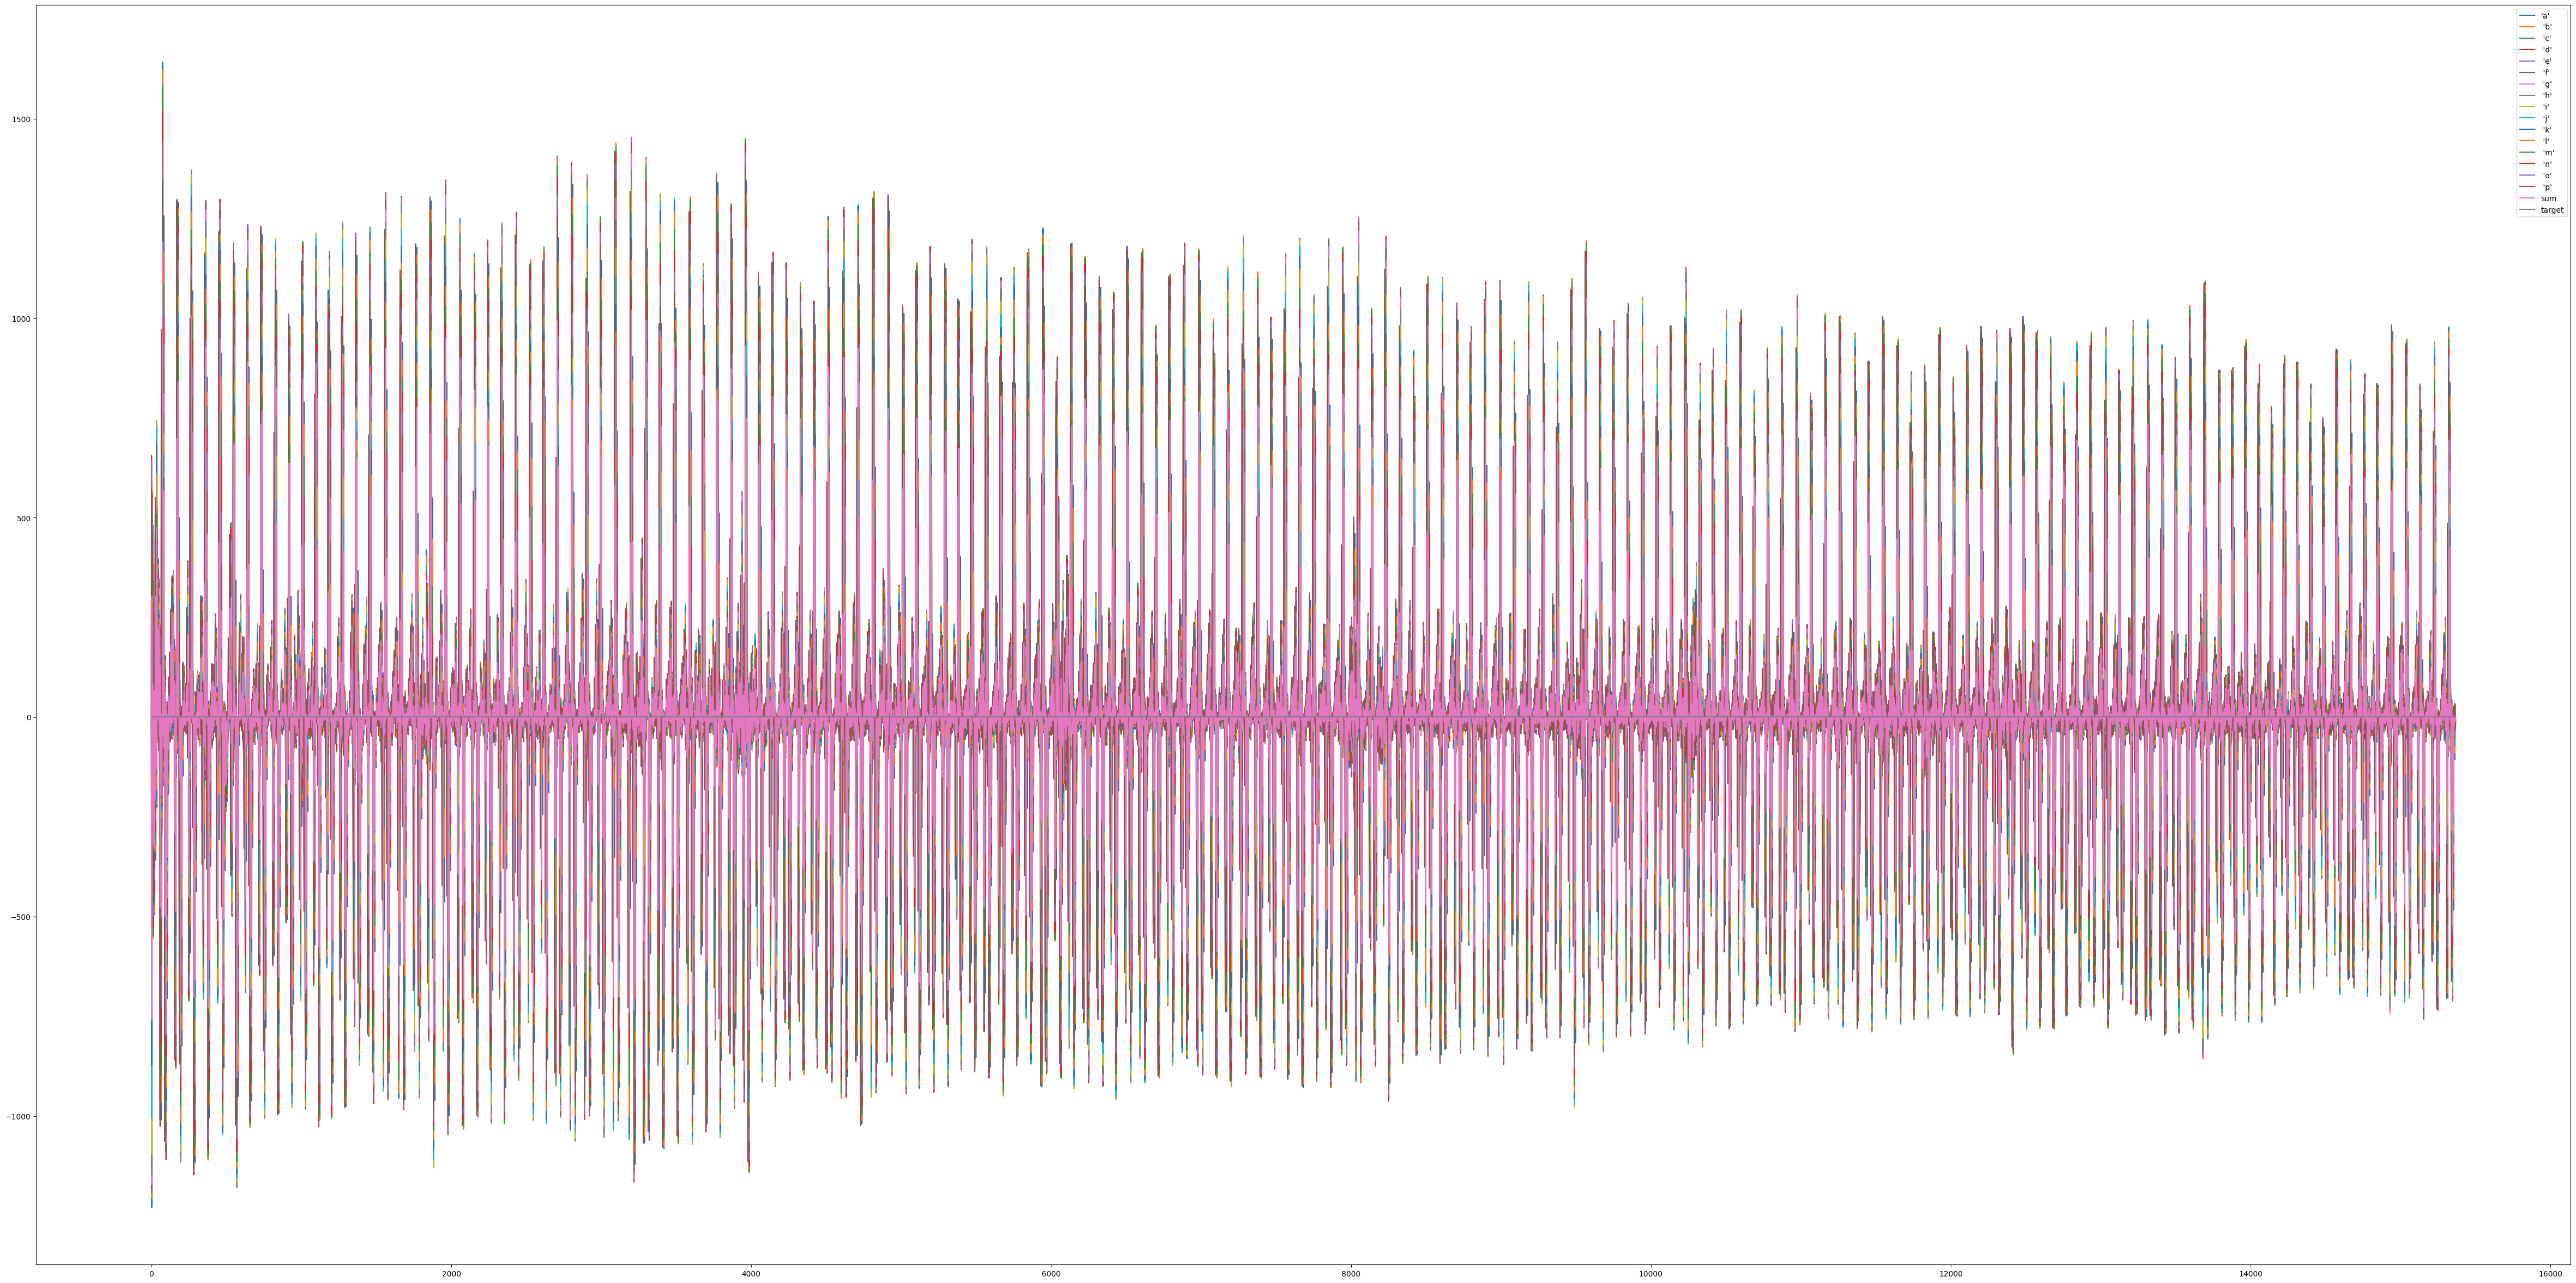

In [25]:
#graph the data
plt.rcParams['figure.figsize'] = [60, 30]
grab.plot()

In [13]:
#count the number of columns with bigger than 10000
(grab > 100).sum()
#(data < -1000).sum()

'a'       0
 'b'      0
 'c'      0
 'd'      0
 'e'      0
 'f'      0
 'g'      0
 'h'      0
 'i'      0
 'j'      0
 'k'      0
 'l'      0
 'm'      0
 'n'      0
 'o'      0
 'p'      0
target    0
dtype: int64

In [18]:
# Merge the data
data = pd.concat([base, grab], axis=0)
#shuffle the data
data = data.sample(frac=1)
data.describe()

,'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',sum,target
count,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000
mean,-1.015464,-0.894650,-0.598222,-0.224885,0.128759,0.417227,0.636725,0.786081,0.856082,0.835454,0.722432,0.517382,0.222420,-0.137009,-0.508976,-0.804243,0.046956,0.500391
std,279.906499,279.969947,280.057194,280.145061,280.177985,280.109858,279.944015,279.735975,279.555774,279.437512,279.377757,279.373306,279.426855,279.522712,279.625151,279.707613,207.073395,0.500008
min,-2495.316626,-2484.018625,-2478.561548,-2460.182940,-2599.210797,-2714.351413,-2801.350135,-2864.158790,-2908.147521,-2935.449511,-2943.265817,-2926.496624,-2882.243647,-2812.085653,-2720.828417,-2613.884269,-2128.275626,0.000000
25%,-18.426870,-18.303893,-17.660161,-17.396907,-16.793025,-16.379718,-16.217913,-15.880828,-15.819571,-15.848777,-16.309136,-16.427181,-16.647349,-17.186635,-17.611605,-18.176006,-11.357961,0.000000
50%,-0.145864,-0.098436,0.061794,0.325546,0.572406,0.683783,0.580014,0.610845,0.548281,0.481404,0.454806,0.389677,0.230643,0.126118,-0.068026,-0.056152,0.020566,1.000000
75%,19.857707,20.475446,20.692772,21.021578,21.968400,22.080154,22.365230,22.479643,22.188541,22.359564,22.066423,21.840415,21.260514,20.556053,20.223596,19.702367,13.664687,1.000000
max,2894.213696,3089.831505,3260.171241,3401.953284,3510.947104,3581.556456,3609.736234,3597.173537,3552.382818,3485.463815,3400.657295,3293.773197,3156.717539,3094.229429,3015.979608,2890.790854,2611.273239,1.000000


In [15]:
data.describe()

,'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',target
count,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000
mean,0.002838,-0.016107,-0.084782,-0.178666,-0.276319,-0.359261,-0.416691,-0.456061,-0.468912,-0.450143,-0.411402,-0.359628,-0.285641,-0.197848,-0.110021,-0.040111,0.500391
std,19.767258,19.758540,19.726659,19.699584,19.683232,19.675073,19.679149,19.673012,19.680485,19.685524,19.667050,19.657836,19.661260,19.674750,19.693558,19.730079,0.500008
min,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,0.000000
25%,-4.923760,-5.075891,-5.129389,-5.210308,-5.443164,-5.470633,-5.540688,-5.568798,-5.497271,-5.539296,-5.467258,-5.411702,-5.269093,-5.095735,-5.013879,-4.885489,0.000000
50%,0.036285,0.024487,-0.015372,-0.080982,-0.142390,-0.170096,-0.144283,-0.151952,-0.136389,-0.119753,-0.113136,-0.096935,-0.057374,-0.031373,0.016922,0.013968,1.000000
75%,4.571038,4.540700,4.381841,4.316850,4.167711,4.065595,4.025608,3.942287,3.927144,3.934364,4.048152,4.077323,4.131723,4.264928,4.369855,4.509148,1.000000
max,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,1.000000


In [16]:
# # drop data above or below 1000
# data = data[(data <= 40).all(axis=1)]
# data = data[(data >= -40).all(axis=1)]

In [17]:
data.describe()

,'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',target
count,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000,30712.000000
mean,0.002838,-0.016107,-0.084782,-0.178666,-0.276319,-0.359261,-0.416691,-0.456061,-0.468912,-0.450143,-0.411402,-0.359628,-0.285641,-0.197848,-0.110021,-0.040111,0.500391
std,19.767258,19.758540,19.726659,19.699584,19.683232,19.675073,19.679149,19.673012,19.680485,19.685524,19.667050,19.657836,19.661260,19.674750,19.693558,19.730079,0.500008
min,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,0.000000
25%,-4.923760,-5.075891,-5.129389,-5.210308,-5.443164,-5.470633,-5.540688,-5.568798,-5.497271,-5.539296,-5.467258,-5.411702,-5.269093,-5.095735,-5.013879,-4.885489,0.000000
50%,0.036285,0.024487,-0.015372,-0.080982,-0.142390,-0.170096,-0.144283,-0.151952,-0.136389,-0.119753,-0.113136,-0.096935,-0.057374,-0.031373,0.016922,0.013968,1.000000
75%,4.571038,4.540700,4.381841,4.316850,4.167711,4.065595,4.025608,3.942287,3.927144,3.934364,4.048152,4.077323,4.131723,4.264928,4.369855,4.509148,1.000000
max,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,1.000000


<Axes: >

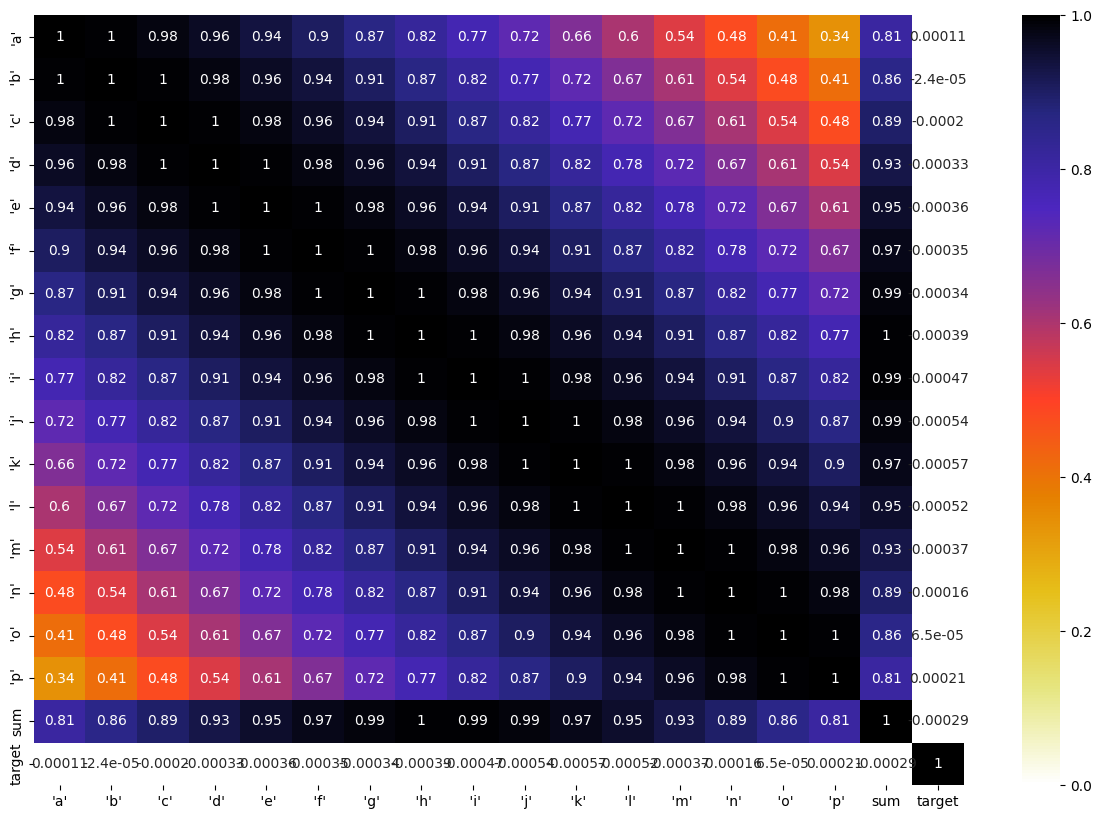

In [19]:
cor = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

Epoch 1/50


/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3931/3931 ━━━━━━━━━━━━━━━━━━━━ 4s 826us/step - accuracy: 0.5311 - loss: 2.9216 - val_accuracy: 0.5173 - val_loss: 0.7260
Epoch 2/50
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 3s 812us/step - accuracy: 0.5348 - loss: 0.7233 - val_accuracy: 0.5324 - val_loss: 0.6947
Epoch 3/50
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 3s 812us/step - accuracy: 0.5307 - loss: 0.6969 - val_accuracy: 0.5134 - val_loss: 0.6917
Epoch 4/50
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 3s 805us/step - accuracy: 0.5247 - loss: 0.6946 - val_accuracy: 0.5022 - val_loss: 0.6936
Epoch 5/50
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 3s 810us/step - accuracy: 0.5184 - loss: 0.6992 - val_accuracy: 0.5144 - val_loss: 0.6917
Epoch 6/50
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 5s 817us/step - accuracy: 0.5094 - loss: 0.6942 - val_accuracy: 0.5287 - val_loss: 0.6934
Epoch 7/50
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 3s 805us/step - accuracy: 0.5086 - loss: 0.7025 - val_accuracy: 0.5214 - val_loss: 0.6952
Epoch 8/50
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 3s 817us/step - accuracy: 0.5378 - loss: 0.69

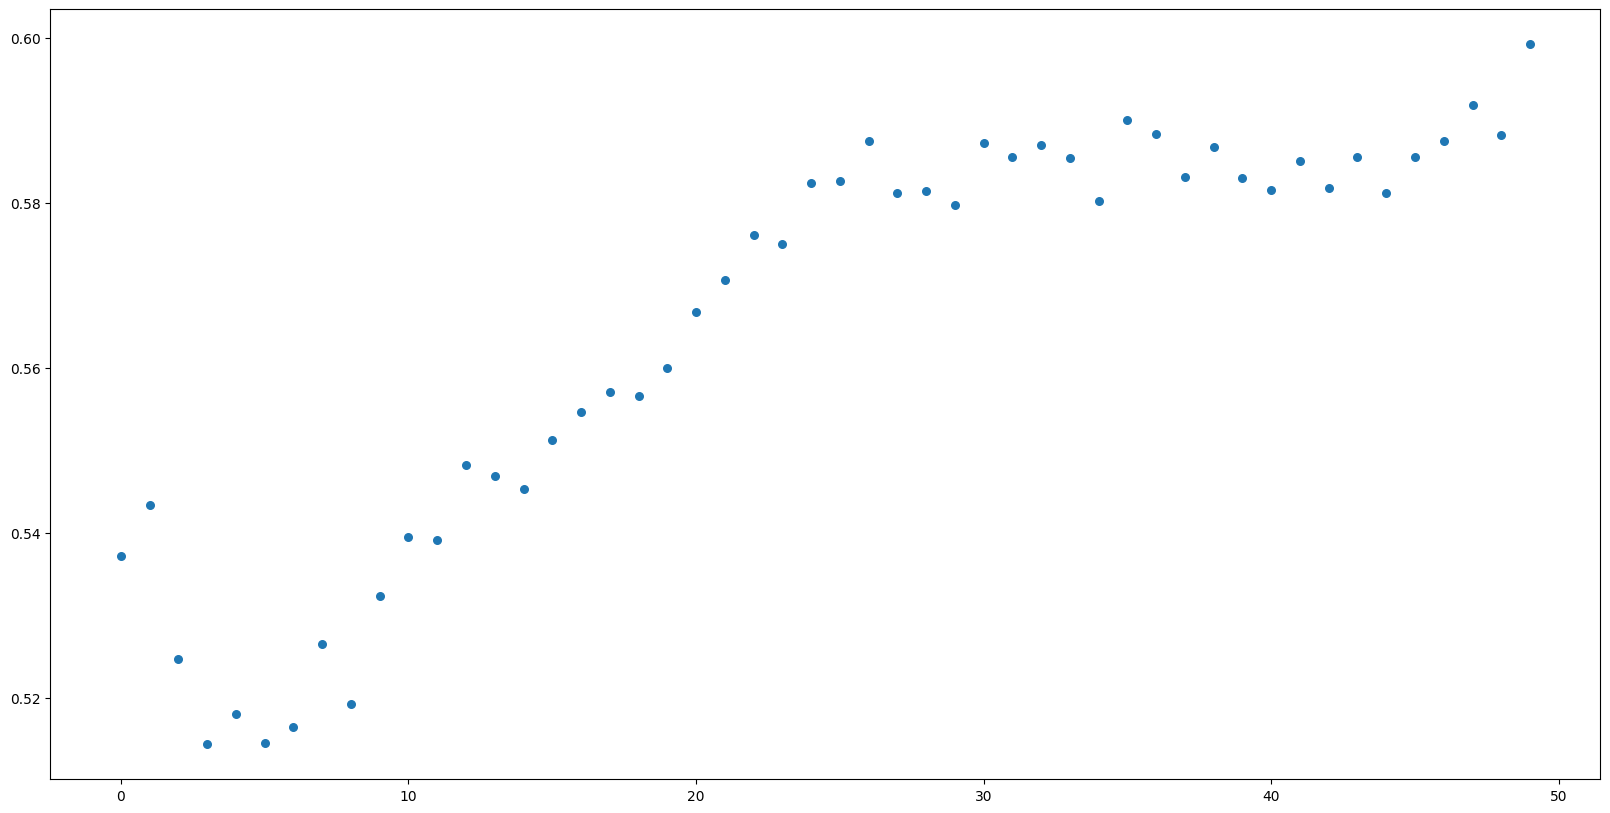

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

number_of_epochs = 50
model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=5, validation_split=0.2)

plt.scatter(range(number_of_epochs), model.history.history['accuracy'], s=30)
predictions = model.predict(X_test)
print("Accuracy: ", model.evaluate(X_test, y_test)[1])
print(predictions[:5])
print(y_test[:5])

In [22]:
#Print the importance of each feature
importance = model.get_weights()[0]
importance = pd.DataFrame(importance)
importance = importance.T
importance = importance.abs()
importance = importance.sum(axis=1)
importance = importance / importance.sum()
importance.sort_values(ascending=False)

7     0.052470
26    0.024880
24    0.022172
53    0.021573
58    0.021279
        ...   
40    0.010203
56    0.010060
18    0.010031
51    0.008873
13    0.008770
Length: 64, dtype: float32

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
#What is n_estimators?
#n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the best number of trees for the specific use case.

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#What is RandomForestClassifier?
#Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

Accuracy: 0.6638450268598405

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64      3118
           1       0.63      0.75      0.69      3025

    accuracy                           0.66      6143
   macro avg       0.67      0.67      0.66      6143
weighted avg       0.67      0.66      0.66      6143

